# Análise do Ensaio do Aeropêndulo ccom Controlador PI

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *
import scienceplots

%config InlineBackend.figure_format='retina'
plt.style.use(["science", "notebook"])

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

**Importando as bibliotecas usadas para a análise**

In [3]:
# arquivo_15_6_2023_23_10_43.csv
file = "../interface_aeropendulo/interface/dados_de_ensaio/arquivo_7_6_2023_20_39_55.csv"
dados_malha_aberta = pd.read_csv(file, header=None, sep=',').values
dados_malha_aberta

array([[    nan,   0.   ,   1.   , ...,   4.   ,   5.   ,   6.   ],
       [  0.   ,  30.   ,  56.308, ...,  30.   ,  30.   , 538.383],
       [  1.   ,  30.   ,  56.11 , ...,  30.   ,  30.   , 538.403],
       ...,
       [967.   ,  60.   ,  56.242, ...,  30.   ,  30.   , 557.742],
       [968.   ,  60.   ,  56.374, ...,  30.   ,  30.   , 557.762],
       [969.   ,  60.   ,  56.044, ...,  30.   ,  30.   , 557.782]])

In [4]:
dados_malha_aberta[0][0] = 0.0
dados_malha_aberta[:,0]

array([  0.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 14

**Obtendo os sinais do ensaio**

In [5]:
tempo = np.array(dados_malha_aberta[:,7])
sinal_ref  = np.array(dados_malha_aberta[:,1])
sinal_saida = np.array(dados_malha_aberta[:,2])
sinal_controle = np.array(dados_malha_aberta[:,4])


## Plotagem dos sinais

###  **Sinais de Referência e de Saída**


Periodo de Amostragem: 0.02


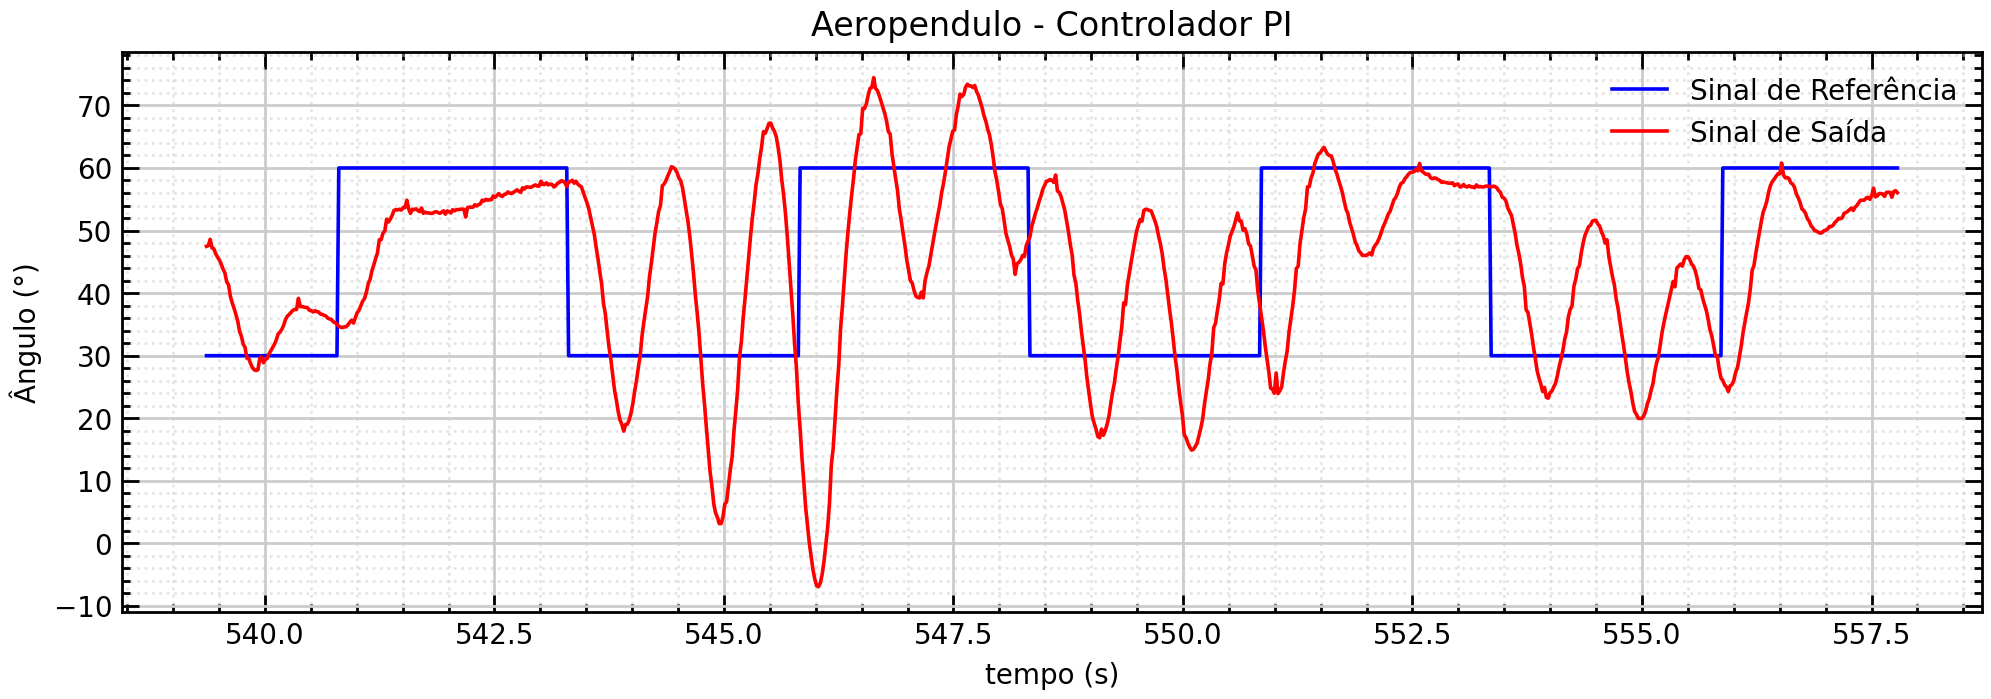

In [8]:
Ts = 0.02
print('\nPeriodo de Amostragem:', Ts)


plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_ref[50:], c = 'b', lw=1.3, label = "Sinal de Referência")
plt.plot(tempo[50:], sinal_saida[50:], c = 'r', lw=1.3, label = "Sinal de Saída")

plt. title('Aeropendulo - Controlador PI', fontsize=12)
plt.ylabel('Ângulo (°)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

### **Sinal de Controle**

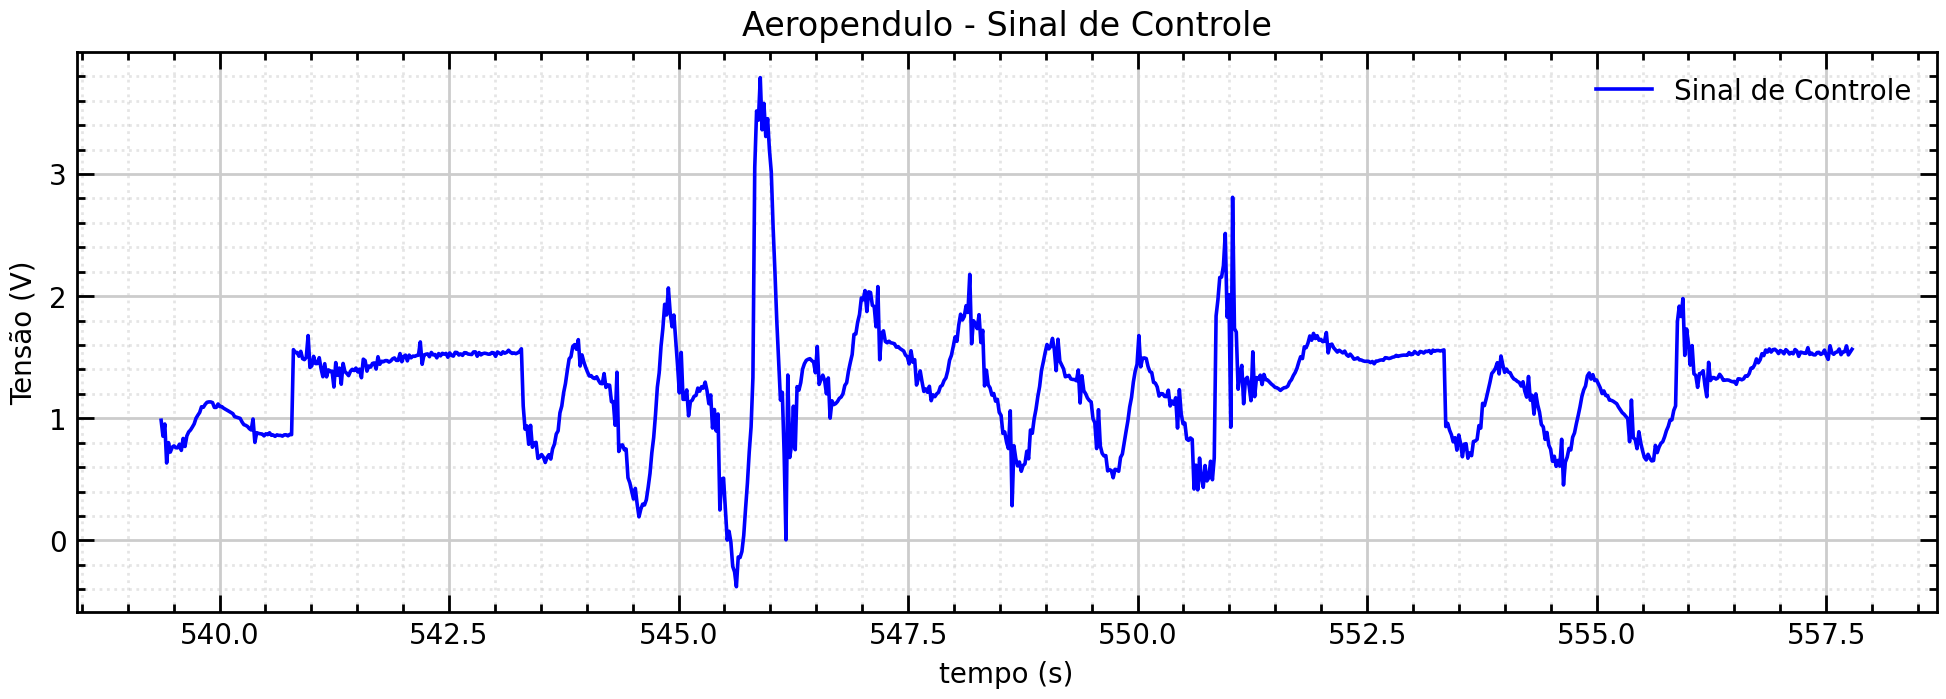

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(212)
plt.plot(tempo[50:], sinal_controle[50:], c = 'b', lw=1.3, label = "Sinal de Controle")

plt. title('Aeropendulo - Sinal de Controle', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()